In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import pmdarima as pm
import warnings 

from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima



warnings.filterwarnings("ignore") 

%matplotlib inline

In [2]:
hourly_mean = pd.read_csv('../../data/Fernando/hourly_mean.csv')

In [3]:
hourly_mean_test = pd.read_csv('../../data/Fernando/hourly_mean_test.csv')

In [4]:
hourly_mean.head()

,datetime,Valor,Dia,Ano,Hora,Minuto
0,2015-03-02 00:00:00,1.000,2.0,2015.0,0.0,0.0
1,2015-03-02 01:00:00,32.565,2.0,2015.0,1.0,0.0
2,2015-03-02 02:00:00,38.347,2.0,2015.0,2.0,0.0
3,2015-03-02 03:00:00,26.616,2.0,2015.0,3.0,0.0
4,2015-03-02 04:00:00,17.202,2.0,2015.0,4.0,0.0


In [5]:
hourly_mean_test.head()

,datetime,Valor
0,2016-03-01 00:00:00,27.298
1,2016-03-01 01:00:00,176.818
2,2016-03-01 02:00:00,137.341
3,2016-03-01 03:00:00,116.532
4,2016-03-01 04:00:00,84.029


# Arima - Cálculos

In [7]:
result = adfuller(hourly_mean['Valor'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -14.898662
p-value: 0.000000


<Figure size 1152x576 with 0 Axes>

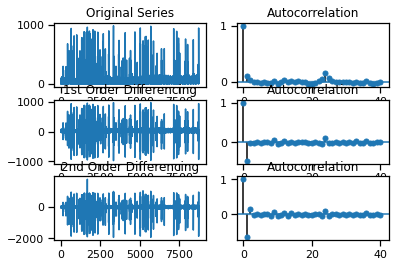

In [28]:
# Original Series
plt.figure(figsize=(16,8))
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(hourly_mean['Valor']); axes[0, 0].set_title('Original Series')
plot_acf(hourly_mean['Valor'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(hourly_mean['Valor'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(hourly_mean['Valor'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(hourly_mean['Valor'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(hourly_mean['Valor'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [29]:
result = adfuller(hourly_mean['Valor'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -26.647730
p-value: 0.000000


In [32]:
stepwise_fit = auto_arima(hourly_mean["Valor"], start_p = 1, start_q = 1, 

                          max_p = 3, max_q = 3, seasonal = True, 

                          d = 1, trace = True, 

                          error_action ='ignore',   # we don't want to know if an order does not work 

                          suppress_warnings = True)           # set to stepwise 

  
# To print the summary 
stepwise_fit.summary() 


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=106031.382, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=103928.684, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=106029.382, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=103152.282, Time=0.41 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=102698.360, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=10.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.51 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=102696.360, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=103150.282, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=2.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=1.44 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 25.116 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8760
Model:               SARIMAX(3, 1, 0)   Log Likelihood              -51344.180
Date:                Tue, 03 Nov 2020   AIC                         102696.360
Time:                        19:14:32   BIC                         102724.671
Sample:                             0   HQIC                        102706.006
                               - 8760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6626      0.004   -181.742      0.000      -0.670      -0.655
ar.L2         -0.4260      0.005    -92.234      0.000      -0.435      -0.417
ar.L3         -0.2252      0.004    -53.971      0.000      -0.233      -0.217
sigma2      7231.0352     21.280    339.800      0.000    7189.327    7272.744
===================================================================================
Ljung-Box (Q):                      975.10   Jarque-Bera (JB):           1008514.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             5.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
model_arima = ARIMA(hourly_mean['Valor'], order=(3,1,0))
model_fit_arima = model_arima.fit()
print(model_fit_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Valor   No. Observations:                 8760
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -51344.180
Date:                Tue, 03 Nov 2020   AIC                         102696.360
Time:                        19:15:37   BIC                         102724.671
Sample:                             0   HQIC                        102706.006
                               - 8760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6626      0.004   -181.742      0.000      -0.670      -0.655
ar.L2         -0.4260      0.005    -92.234      0.000      -0.435      -0.417
ar.L3         -0.2252      0.004    -53.971      0.0

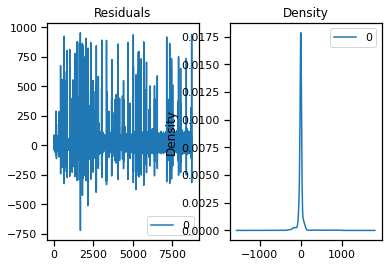

In [37]:
residuals = pd.DataFrame(model_fit_arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Arima - Gráficos

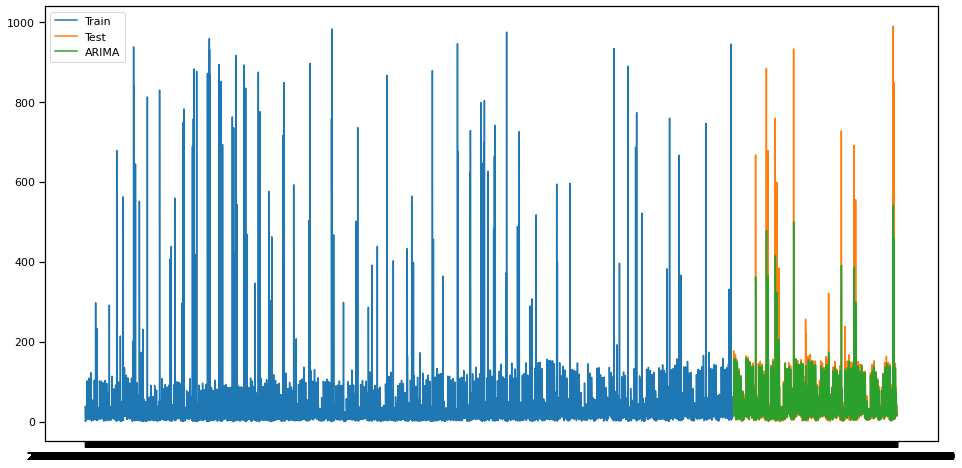

In [38]:
actual_values = hourly_mean_test['Valor']
df_train_history = [x for x in hourly_mean['Valor']]
predictions = list()
for i in range(len(actual_values)):
    model_fit = ARIMA(df_train_history,order=(1,1,0)).fit()
    predictions.append(model_fit.predict(len(df_train_history),len(df_train_history)))
    df_train_history.append(actual_values[i])
df_predict = hourly_mean_test.copy()
df_predict['Valor'] = predictions
plt.figure(figsize=(16,8))
plt.plot(hourly_mean['datetime'], hourly_mean['Valor'], label='Train')
plt.plot(hourly_mean_test['datetime'],hourly_mean_test['Valor'], label='Test')
plt.plot(df_predict['datetime'],df_predict['Valor'], label='ARIMA')
plt.legend(loc='best')
plt.show()